In [1]:
import pandas as pd

## Data Collection

In [2]:
dataset = pd.read_csv("healthcaredata_preprocessed.csv")

In [3]:
dataset

,Unnamed: 0,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...
1332,1333,50,male,30.970,3,no,northwest,10600.54830
1333,1334,18,female,31.920,0,no,northeast,2205.98080
1334,1335,18,female,36.850,0,no,southeast,1629.83350
1335,1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
dataset.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1332,50,male,30.970,3,no,northwest,10600.54830
1333,18,female,31.920,0,no,northeast,2205.98080
1334,18,female,36.850,0,no,southeast,1629.83350
1335,21,female,25.800,0,no,southwest,2007.94500


## Data preprocessing

In [6]:
dataset.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [8]:
dataset.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
def quanQual(dataset):
    quan = []
    qual = []

    for columnName in dataset.columns:
        if dataset[columnName].dtype =='O':
            qual.append(columnName)
        else:
            quan.append(columnName)
    return quan, qual

In [10]:
quan , qual =  quanQual(dataset)

In [11]:
quan

['age', 'bmi', 'children', 'charges']

In [12]:
qual

['sex', 'smoker', 'region']

In [13]:
# checking how many categories values are present Categorical data column
dataset['sex'].value_counts()

sex
male      675
female    662
Name: count, dtype: int64

In [14]:
dataset['smoker'].value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

In [15]:
dataset['region'].value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

## Univariate (EDA)

In [16]:
import numpy as np

In [17]:
descriptive = pd.DataFrame(columns = quan ,index=['Mean', 'Median', 'Mode', "Q1:25%", "Q2:50%", "Q3:75%", "99%","Q4:100%", "IQR", "1.5rule", "Lesser", "Greater", "min", "max"])
for columnName in quan:
    descriptive.loc["Mean", columnName] = dataset[columnName].mean()
    descriptive.loc["Median", columnName] = dataset[columnName].median()
    descriptive.loc["Mode", columnName] = dataset[columnName].mode()[0]
    descriptive.loc["Q1:25%", columnName] = dataset.describe()[columnName]["25%"]
    descriptive.loc["Q2:50%", columnName] = dataset.describe()[columnName]["50%"]
    descriptive.loc["Q3:75%", columnName] = dataset.describe()[columnName]["75%"]
    descriptive.loc["Q4:100%", columnName] = dataset.describe()[columnName]["max"]
    descriptive.loc["99%", columnName] = np.percentile(dataset[columnName],99)
    descriptive.loc["IQR", columnName] = descriptive[columnName]["Q3:75%"] - descriptive[columnName]["Q1:25%"]#descriptive.loc["Q3:75%", columnName] - descriptive.loc["Q1:25%", columnName]
    descriptive.loc["1.5rule", columnName] = 1.5 *  descriptive.loc["IQR", columnName]
    # 1.5 rule = 1.5 * IQR
    # lesser formula -->  Q1 - (1.5 * IQR)  ie. Q1 - 1.5rule
    descriptive.loc["Lesser", columnName] =  descriptive[columnName]["Q1:25%"] - descriptive.loc["1.5rule", columnName]  
    descriptive.loc["Greater", columnName] = descriptive[columnName]["Q3:75%"] + descriptive.loc["1.5rule", columnName]  # Q3 + 1.5 * IQR
    descriptive.loc["min", columnName] = dataset[columnName].min()
    descriptive.loc["max", columnName] = dataset[columnName].max()

In [18]:
descriptive

,age,bmi,children,charges
Mean,39.222139,30.663452,1.095737,13279.121487
Median,39.0,30.4,1.0,9386.1613
Mode,18,32.3,0,1121.8739
Q1:25%,27.0,26.29,0.0,4746.344
Q2:50%,39.0,30.4,1.0,9386.1613
Q3:75%,51.0,34.7,2.0,16657.71745
99%,64.0,46.4112,5.0,48537.796878
Q4:100%,64.0,53.13,5.0,63770.42801
IQR,24.0,8.41,2.0,11911.37345
1.5rule,36.0,12.615,3.0,17867.060175


## Handling Outliers

In [19]:
lesser = []
greater = []
for colunName in quan:
    if descriptive[colunName]["min"] < descriptive[colunName]['Lesser']:
        lesser.append(colunName)
    if descriptive[colunName]["max"] > descriptive[colunName]['Greater']:
         greater.append(colunName)

In [20]:
lesser

[]

In [21]:
greater

['bmi', 'charges']

In [22]:
for columnName in lesser:
    dataset.loc[dataset[columnName]<descriptive[columnName]["Lesser"], columnName]= descriptive[columnName]["Lesser"]
    print(dataset[columnName])
    print(dataset[columnName]<descriptive[columnName]["Lesser"])
for columnName in greater:
    dataset.loc[dataset[columnName]>descriptive[columnName]["Greater"], columnName]= descriptive[columnName]["Greater"]

In [23]:
#Checking outliers

lesser = []
greater = []
for colunName in quan:
    if descriptive[colunName]["min"] < descriptive[colunName]['Lesser']:
        lesser.append(colunName)
    if descriptive[colunName]["max"] > descriptive[colunName]['Greater']:
         greater.append(colunName)

print('Lesser outlier', lesser)
print('Greater Outlier', greater)

Lesser outlier []
Greater Outlier ['bmi', 'charges']


## Skewness and Kurtosis, variance, standard deviation

In [24]:
for columnName in quan:
    descriptive.loc["skew", columnName] = dataset[columnName].skew()
    descriptive.loc["kurtosis", columnName] = dataset[columnName].kurtosis()
    descriptive.loc['Variance',columnName] = dataset[columnName].var()
    descriptive.loc['Standard Deviation',columnName] = dataset[columnName].std()

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

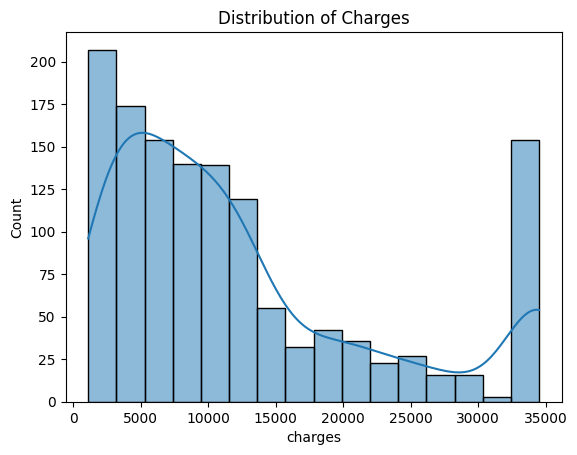

In [26]:
#Distribution of Charges
import seaborn as sns
sns.histplot(dataset['charges'], kde=True)
plt.title("Distribution of Charges")
plt.show()

The data is **right-skewed**, which means most of the charge values are low and found on the left side of the graph. Only a few higher charge values are on the right side.

There are many values between **0 and 15,000**. As the charges go up, there are fewer and fewer of them.

Some very high values on the right might be outliers (unusually large numbers).

***Because the data is right-skewed, the average (mean) is higher than the middle value (median), and the median is higher than the most common value (mode)***.
- So: **mean > median > mode**.


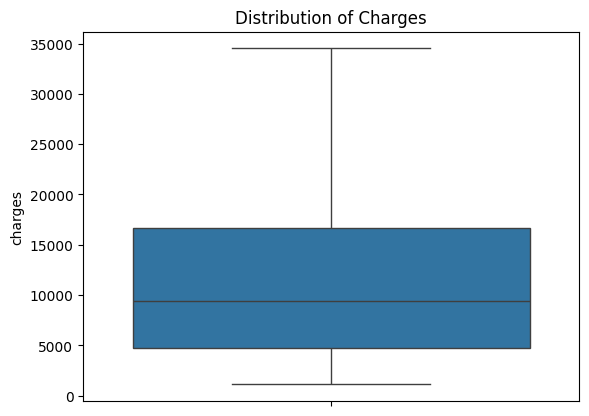

In [27]:
#Distribution of Charges
import seaborn as sns
sns.boxplot(y=dataset['charges'])
plt.title("Distribution of Charges")
plt.show()

- The boxplot of ***charges*** confirms that most values are concentrated at the lower end, with a median below the center of the box, indicating a ***right-skewed distribution***. 
- The plot also shows many ***outliers***—cases with exceptionally high charges—which further emphasize that the data includes rare but very large values. This pattern is consistent with the histogram and explains why the mean is likely higher than the median.

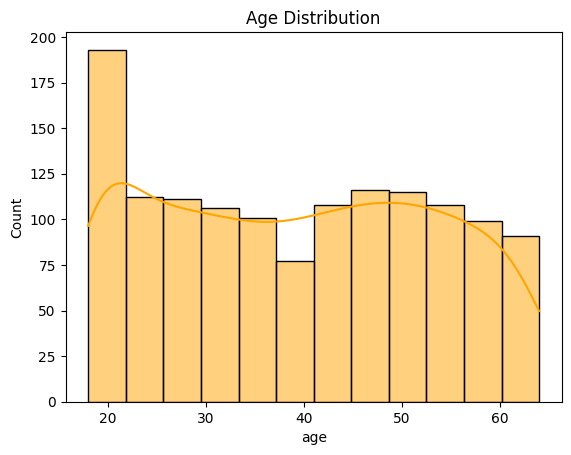

In [28]:
#Age Distribution
sns.histplot(dataset['age'], kde=True, color='orange')
plt.title("Age Distribution")
plt.show()

- The histogram of the **age** variable shows that the dataset includes individuals from ages **18 to 64**, with the largest groups at the youngest **(around 18–20 years)** and an **older age group (around 50 years)**. 
- The distribution is not uniform, as there are multiple peaks, and fewer individuals are present in the mid-30s to early 40s age range. 
- This indicates a **bimodal or multimodal distribution**, meaning the dataset has two or more age groups with higher frequencies(higher number of people).

### BMI

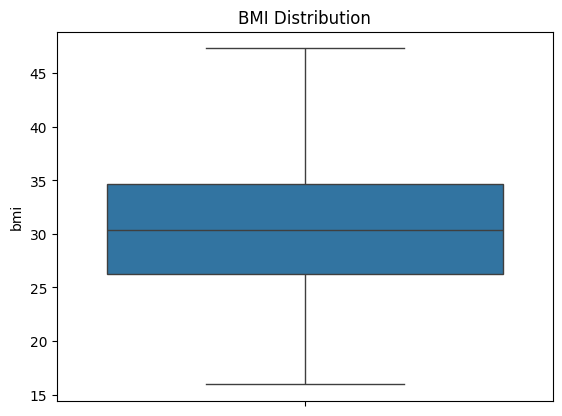

In [29]:
#BMI Distribution
sns.boxplot(dataset['bmi'])
plt.title("BMI Distribution")
plt.show()

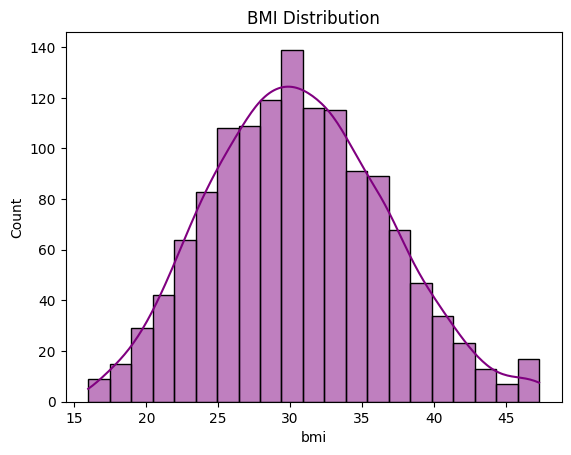

In [30]:
#BMI Distribution
sns.histplot(dataset['bmi'], kde=True, color='purple')
plt.title("BMI Distribution")
plt.show()

- The boxplot of BMI values shows that most individuals have a BMI between 27 and 35, with a **median** around 30.
- Several outliers are present, indicating a few individuals have considerably **higher BMI (>45)**.
- The histogram further reveals that the BMI distribution is approximately normal, _with a slight right skew and most values concentrated around 30_. 
- Both plots illustrate that while BMI values are fairly **symmetrically distributed**, there are some cases with unusually high values.

### BMI Categorization

In [32]:

def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'
dataset['bmi_category'] = dataset['bmi'].apply(categorize_bmi)



In [33]:
#method 2
bmidf = pd.DataFrame(index=['Underweight','Normal', 'Overweight', 'Obese'], columns=['bmicount'])
u = 0
n = 0
over=0
ob = 0
# def categorize_bmi(bmi):
for bmi in dataset['bmi']:
    if bmi < 18.5:
        u=u+1
    elif 18.5 <= bmi < 25:
        n=n+1
    elif 25 <= bmi < 30:
        over=over+1
    else:
        ob=ob+1
     # u,n,over,ob
# print(u,n,over,ob)
bmidf.loc['Underweight','bmicount']=u
bmidf.loc['Normal','bmicount']= n
bmidf.loc['Overweight','bmicount']=over
bmidf.loc['Obese','bmicount']=ob
bmidf

,bmicount
Underweight,20
Normal,225
Overweight,386
Obese,706


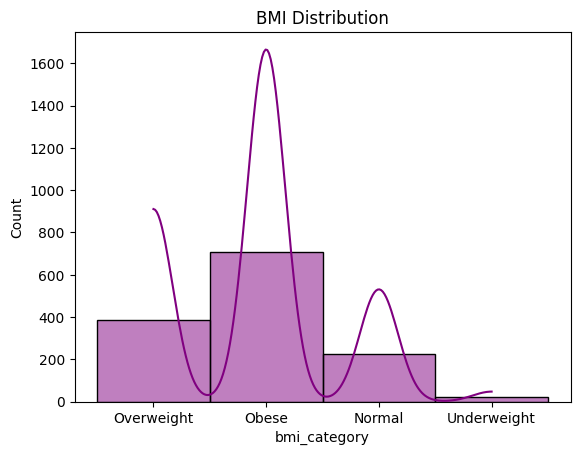

In [34]:
#BMI Distribution
sns.histplot(dataset['bmi_category'], kde=True, color='purple')
plt.title("BMI Distribution")
plt.show()

* The histogram shows the **categories of bmi**
* most of the people fall under **obese** category with the range(600-800) followed by **overweight**
* The number of people with a **Normal** BMI is significantly lower, and there are very few **Underweight** individuals.
* This show strong imbalance with a larger portion in higher bmi categories.

<Axes: ylabel='smoker'>

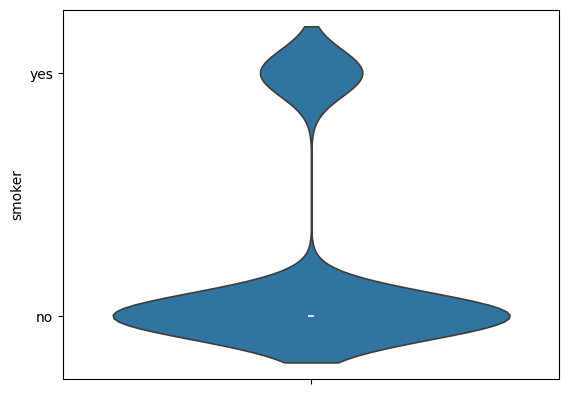

In [36]:
#Smoker vs Non-Smoker 
sns.violinplot(dataset['smoker'])

This violin plot shows the most of the individuals are non-smokers it is comparatively higher than the smokers.


## Bivariate Analysis

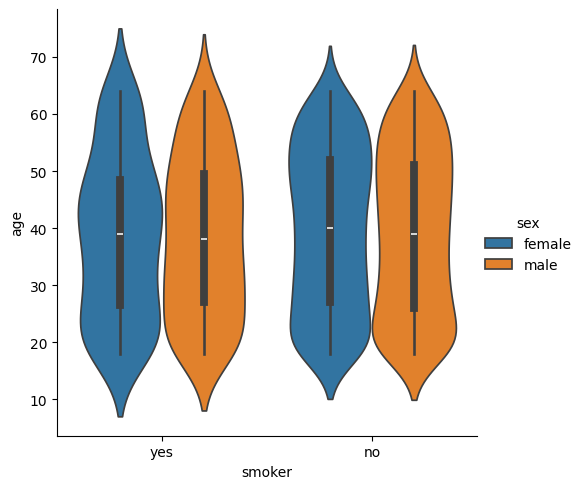

In [38]:
sns.catplot(data=dataset, x="smoker", y="age", hue="sex", kind="violin")

- This bivariate violin plot examines the relationship between the **age, sex, smokers**. 
- This shows that the age distribution for both male and female are relatively similar across the smokers and non smokers groups, 
- with ages ranging from approximately 18 to 65 in all categories
- The shape of the violin plot suggest that the *smoking status* is not strongly associated with the age, sex in this dataset.
- This indicates that both males and females of various ages are evenly represented among both smokers and non-smokers.

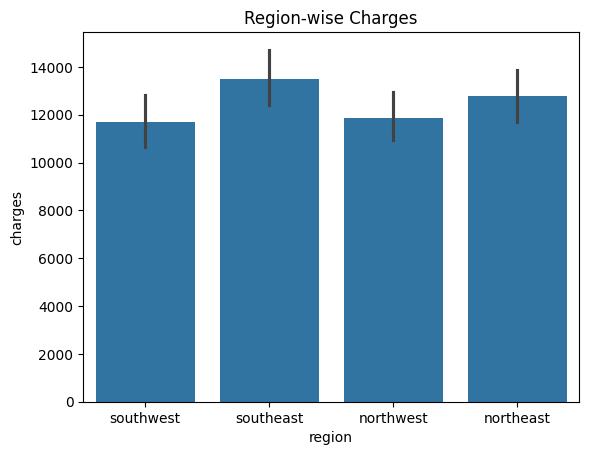

In [55]:
# Region-wise Charge
sns.barplot(data=dataset, x="region", y="charges")
plt.title("Region-wise Charges")
plt.show()

- This bar plot examines the relationship between region and the charges
- The **charges are significantly higher** in the **southeast region** followed by northeast
- The southwest and northwest are similar. both are less compared to southeast and northeast
- This suggests **regional differences in charges**, with individuals in the southeast typically facing the highest costs.

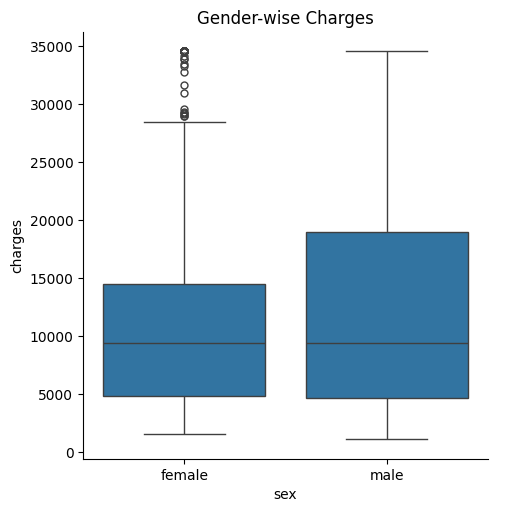

In [56]:
#Gender vs Charges
sns.catplot(data=dataset, x='sex', y='charges', kind='box')
plt.title("Gender-wise Charges")
plt.show()

- The box plot of average charges between gender indicates that the male has higher charges compared to female
- The median charges for both females and males are very similar—median lines are at nearly the same level.
- The interquartile range (box height) is a bit higher for males, suggesting more variability in male charges.
- Both genders have many outliers, with charges above $ 30,000$ and even $60,000$.
- This suggests that, in this dataset, charges are fairly evenly distributed between males and females.

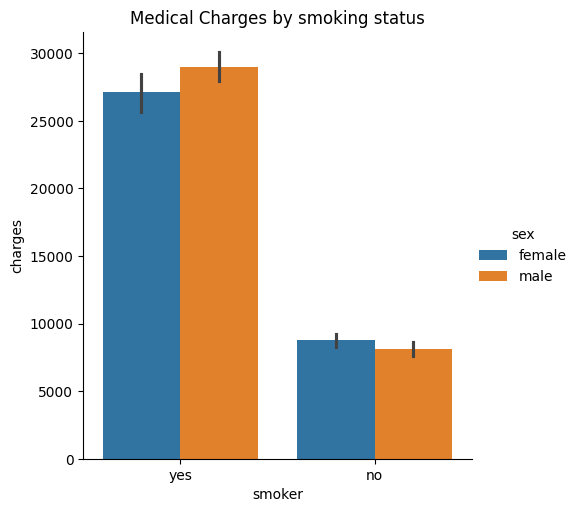

In [57]:
#Gender vs Charges
sns.catplot(data=dataset, x='smoker', y='charges',hue='sex', kind='bar')
plt.title("Medical Charges by smoking status")
plt.show()

- The grouped bar plot displays **average medical charges** across categories of smoking status and gender. 
- It shows that smokers face dramatically higher average charges compared to non-smokers, regardless of gender.
- Among smokers, **males have slightly higher average charges than females**, whereas among non-smokers, **females have marginally higher average charges compared to males**.
- Notably, the difference due to smoking status greatly exceeds that due to gender.

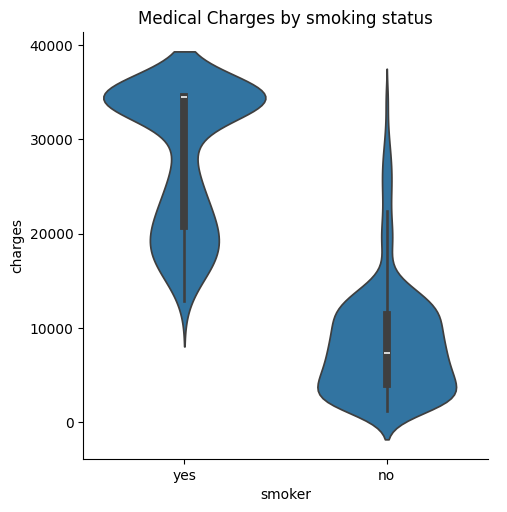

In [58]:
#Gender vs Charges
sns.catplot(data=dataset, x='smoker', y='charges', kind='violin')
plt.title("Medical Charges by smoking status")
plt.show()

- The boxplot compares the distribution of charges for smokers and non-smokers.

- Smokers have a much higher median and a wider spread of charges than non-smokers.

- This suggests that smoking **significantly increases medical costs**.

- This variable is likely a strong predictor in a regression model for medical charges.

<Axes: xlabel='age', ylabel='charges'>

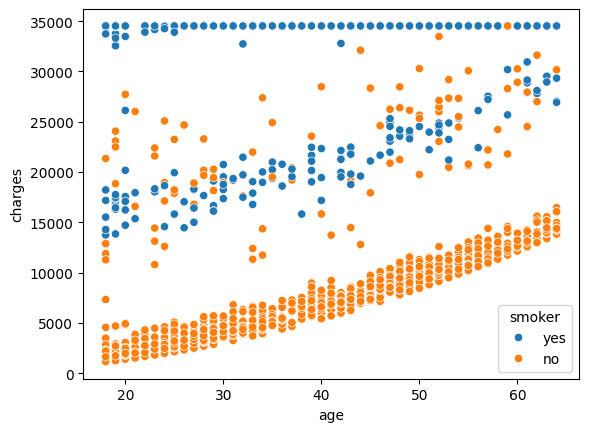

In [61]:
#Age vs Charges
sns.scatterplot(data=dataset, x='age', y='charges', hue='smoker')

The scatter plot shows people’s medical charges by age, with different colors for smokers and non-smokers.

It clearly shows that **smokers have much higher medical charges** than non-smokers, no matter how old they are.

As people get older, charges go up for both groups, but the **difference between smokers and non-smokers stays big** at all ages.

This means that **smoking has a stronger effect on medical charges than age does**, and it creates a clear split between the two groups.


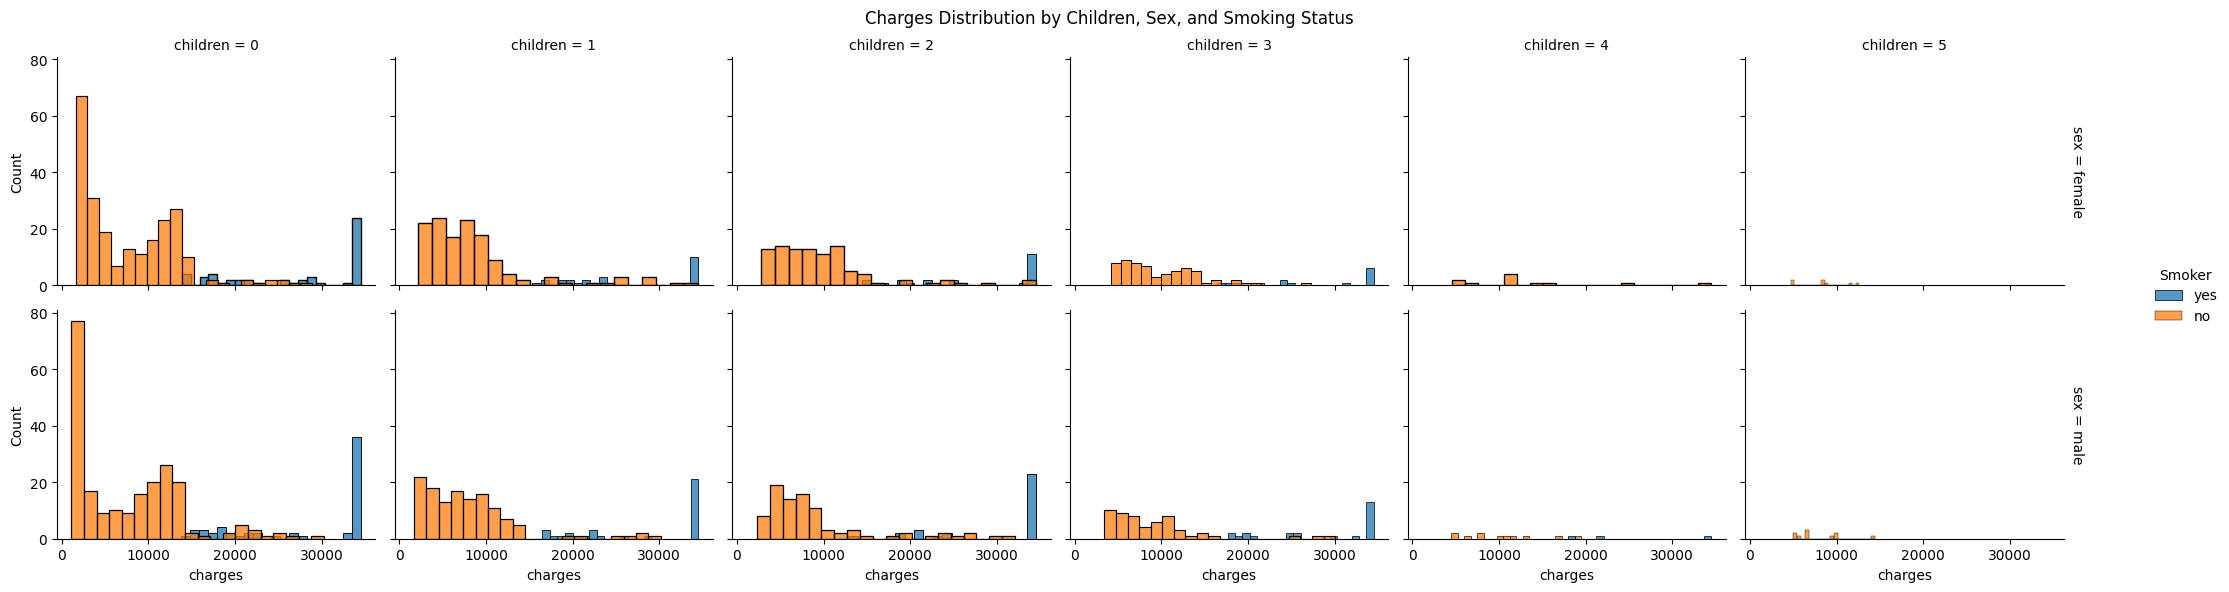

In [81]:
# FacetGrid by children and sex, showing charges distribution, colored by smoker
g = sns.FacetGrid(dataset, col="children", row="sex", hue="smoker", margin_titles=True, height=3, aspect=1.2)
g.map(sns.histplot, "charges", kde=False, bins=20)
g.add_legend(title='Smoker')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Charges Distribution by Children, Sex, and Smoking Status')
plt.show()


- This faceted histogram grid examines **distribution of charges for every combination of sex,number of children & smoker.**
- The plots reveal that, for both females and males, **smokers consistently incur much higher charges than non-smokers**, regardless of family size. Non-smokers predominantly have lower charges in all groups.
- There is no strong trend indicating that the number of children significantly affects the charges for either sex or smoking status. 
- The pattern is stable across both genders, and groups with 4 or 5 children are less common in the data, limiting conclusions for these subgroups.

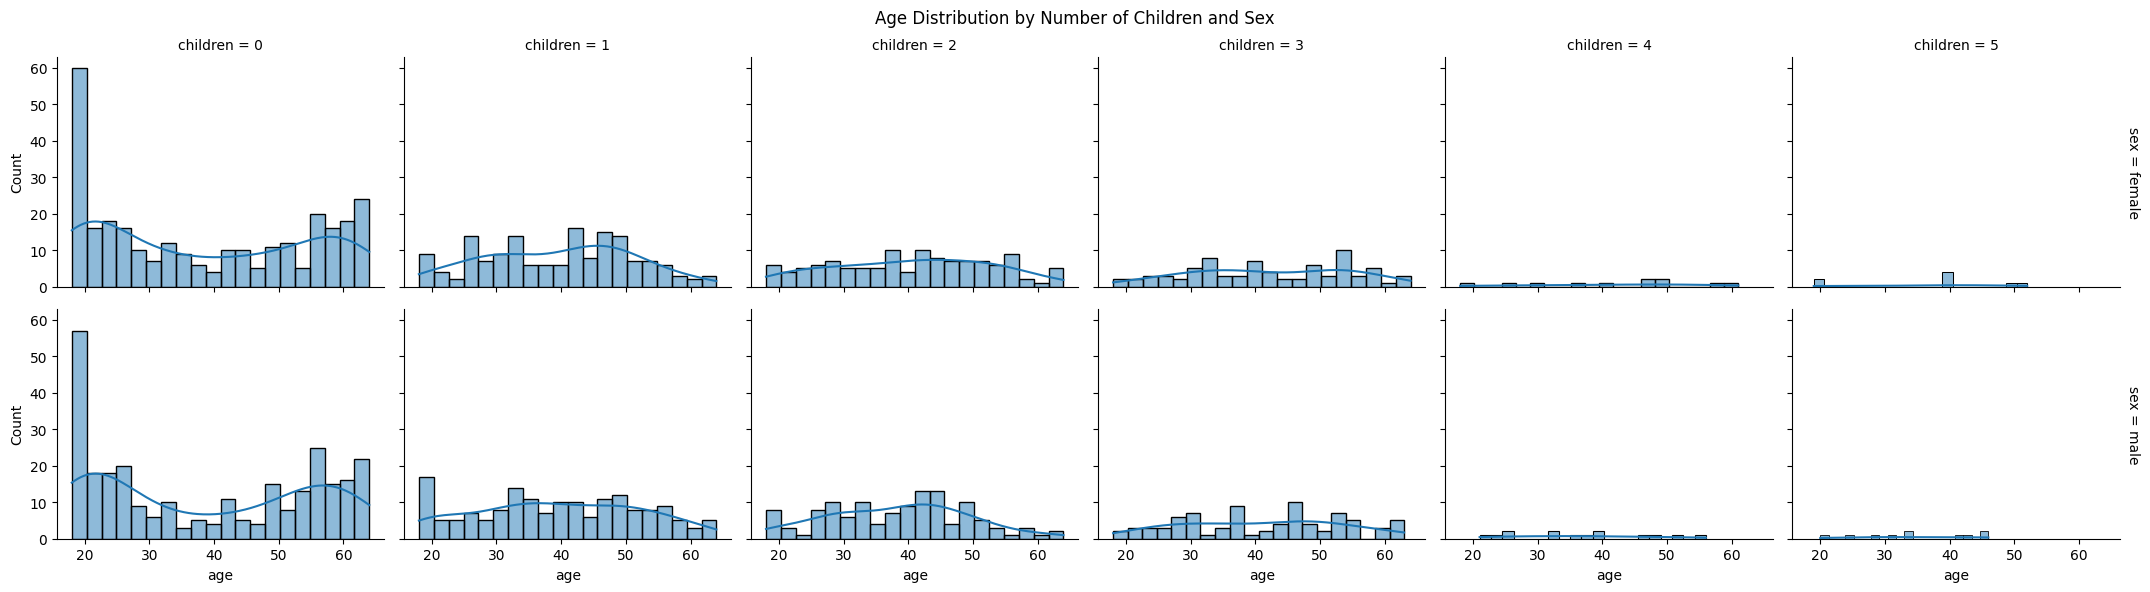

In [82]:
g = sns.FacetGrid(dataset, col="children", row="sex", margin_titles=True, height=3, aspect=1.2)
g.map(sns.histplot, "age", kde=True, bins=20)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Age Distribution by Number of Children and Sex')
plt.show()


- This faceted histogram grid examines **age distribution by number of children and sex**.
- Most individuals with 0 children are either young adults or older adults, while those with 1–3 children are predominantly in the middle-aged range. Very large families (4–5 children) are rare and mostly consist of middle-aged parents.
- The age distribution patterns are **consistent** between females and males across all child categories

In [62]:
dataset[quan].corr()

,age,bmi,children,charges
age,1.000000,0.109344,0.041536,0.298308
bmi,0.109344,1.000000,0.012755,0.198401
children,0.041536,0.012755,1.000000,0.067389
charges,0.298308,0.198401,0.067389,1.000000


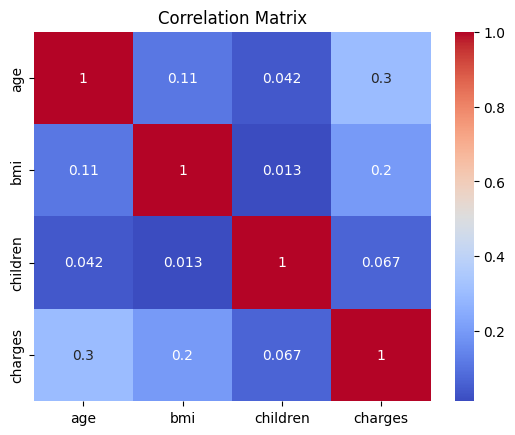

In [63]:
# Correlation Heatmap
sns.heatmap(dataset[quan].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

- The heatmap shows pairwise correlation between numerical features.

- Medical charges have a **strong positive correlation** with age and BMI, and very strong with smoking status (if encoded numerically).

- These variables are likely influential in predicting costs.

- Multicollinearity between some variables (if present) may affect linear models.

### Hypothesis testing

In [73]:
# T-test: Charges between smokers and non-smokers
from scipy.stats import ttest_ind
dataset= dataset.dropna()
smoker_charges = dataset[dataset['smoker']=='yes']['charges']
non_smoker_charges = dataset[dataset['smoker']=='no']['charges']
t_stat, p_val = ttest_ind(smoker_charges, non_smoker_charges)
print("T-test for smokers vs non-smokers:")
print("t-statistic =", t_stat, "\np-value =", p_val)

# Hypothesis Testing Decision
if p_val < 0.05:
    print("Reject Null Hypothesis: There is a significant difference in charges between smokers.")
else:
    print("Fail to Reject Null Hypothesis: There is no significant difference in charges between smokers.")

T-test for smokers vs non-smokers:
t-statistic = 46.64479459840305 
p-value = 1.4067220949376498e-282
Reject Null Hypothesis: There is a significant difference in charges between smokers.


In [ ]:
Anova test

In [80]:
from scipy import stats

# Get the values for etest_p and mba_p
region_values = dataset['age']
charges_values = dataset['charges']

# Perform One-way ANOVA
f_stat, p_value = stats.f_oneway(region_values, charges_values)
print(p_value)
# Hypothesis Testing Decision
if p_value < 0.05:
    print("Reject Null Hypothesis: There is a significant difference between age and charges.")
else:
    print("Fail to Reject Null Hypothesis: There is no significant difference between age and charges.")

2.50511436180246e-274
Reject Null Hypothesis: There is a significant difference between age and charges.


In [82]:
df=dataset
# ANOVA: Charges across regions
anova = stats.f_oneway(*(df[df['region']==r]['charges'] for r in df['region'].unique()))
print("\nANOVA test for regions:")
print("F-statistic =", anova.statistic, ", p-value =", anova.pvalue)
# Hypothesis Testing Decision
if p_value < 0.05:
    print("Reject Null Hypothesis: There is a significant difference between region and charges.")
else:
    print("Fail to Reject Null Hypothesis: There is no significant difference between region and charges.")


ANOVA test for regions:
F-statistic = 2.926139903662776 , p-value = 0.03276288025444947
Reject Null Hypothesis: There is a significant difference between region and charges.
